In [117]:
import pathlib, re, pickle
import pandas as pd
import matplotlib.pyplot as plt
from elyawy.constants import SUMSTATS_LIST, SUMSTATS_DEFINITION
from elyawy.io import load_sims_df
from scipy import stats as st
from sklearn import decomposition
from sklearn.model_selection import train_test_split

In [105]:
MAIN_PATH = '''/home/elyawy/Data'''

MAIN_PATH = pathlib.Path(re.sub(r"\n\s*","", MAIN_PATH))

In [80]:
true_stats = pd.read_csv(MAIN_PATH / "true_stats.csv")
true_stats = true_stats[map(str, range(5,len(true_stats.columns)))]
true_stats.columns = map(str, range(0,27))
realinged_stats = pd.read_csv(MAIN_PATH / "realigned_stats.csv")
infered_stats = pd.read_csv(MAIN_PATH / "infered_stats.csv")

In [106]:
true_stats_with_params = pd.DataFrame()
realinged_stats = pd.DataFrame()
for data in ["test","tenericutes"]:
    temp_true_df = pd.read_csv(MAIN_PATH / data / "true_stats.csv")
    temp_realigned_df = pd.read_csv(MAIN_PATH / data / "true_stats.csv")
    true_stats_with_params = pd.concat([true_stats_with_params,temp_true_df])
    realinged_stats = pd.concat([temp_realigned_df,temp_realigned_df])
true_stats_with_params = true_stats_with_params.reset_index(drop=True)
realinged_stats = realinged_stats.reset_index(drop=True)

In [112]:
true_stats_with_params = true_stats_with_params.sample(frac=1).reset_index(drop=True)
realinged_stats = realinged_stats.sample(frac=1).reset_index(drop=True)

In [115]:
examined_stat = "19"

In [120]:
X_train, X_test, y_train, y_test = train_test_split(true_stats_with_params, realinged_stats[examined_stat])

In [126]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
107,678,0.048335,0.048335,1.914792,1.914792,9.096939,2089.0,872.0,406.0,1568.0,...,23.0,15.0,1.0,104.0,47.0,1.0,75.0,92.0,69.0,913.0
503,1032,0.027904,0.027904,0.233819,0.233819,4.580000,1289.0,1071.0,1027.0,200.0,...,6.0,2.0,6.0,26.0,10.0,15.0,848.0,173.0,61.0,207.0
543,876,0.041710,0.041710,0.327764,0.327764,3.590308,1033.0,905.0,792.0,227.0,...,5.0,6.0,8.0,21.0,14.0,14.0,660.0,106.0,92.0,175.0
28,906,0.041801,0.041801,1.638750,1.638750,13.882064,3193.0,1042.0,816.0,1628.0,...,20.0,12.0,1.0,114.0,64.0,2.0,63.0,46.0,169.0,1466.0
570,978,0.037616,0.037616,0.333125,0.333125,2.948413,1183.0,1013.0,967.0,252.0,...,11.0,5.0,9.0,17.0,7.0,8.0,799.0,166.0,77.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1087,0.046412,0.046412,0.312885,0.312885,3.568452,1420.0,1160.0,1072.0,336.0,...,15.0,7.0,10.0,28.0,15.0,22.0,831.0,221.0,126.0,242.0
853,884,0.017087,0.017087,1.742184,1.742184,8.770181,2041.0,1225.0,827.0,1214.0,...,5.0,7.0,2.0,47.0,20.0,6.0,384.0,174.0,159.0,526.0
266,735,0.044273,0.044273,1.668389,1.668389,9.490566,2184.0,843.0,623.0,1537.0,...,13.0,11.0,0.0,112.0,40.0,1.0,64.0,59.0,183.0,860.0
730,1107,0.031426,0.031426,0.302605,0.302605,4.107143,1291.0,1137.0,1074.0,196.0,...,7.0,5.0,4.0,13.0,7.0,21.0,922.0,110.0,82.0,177.0


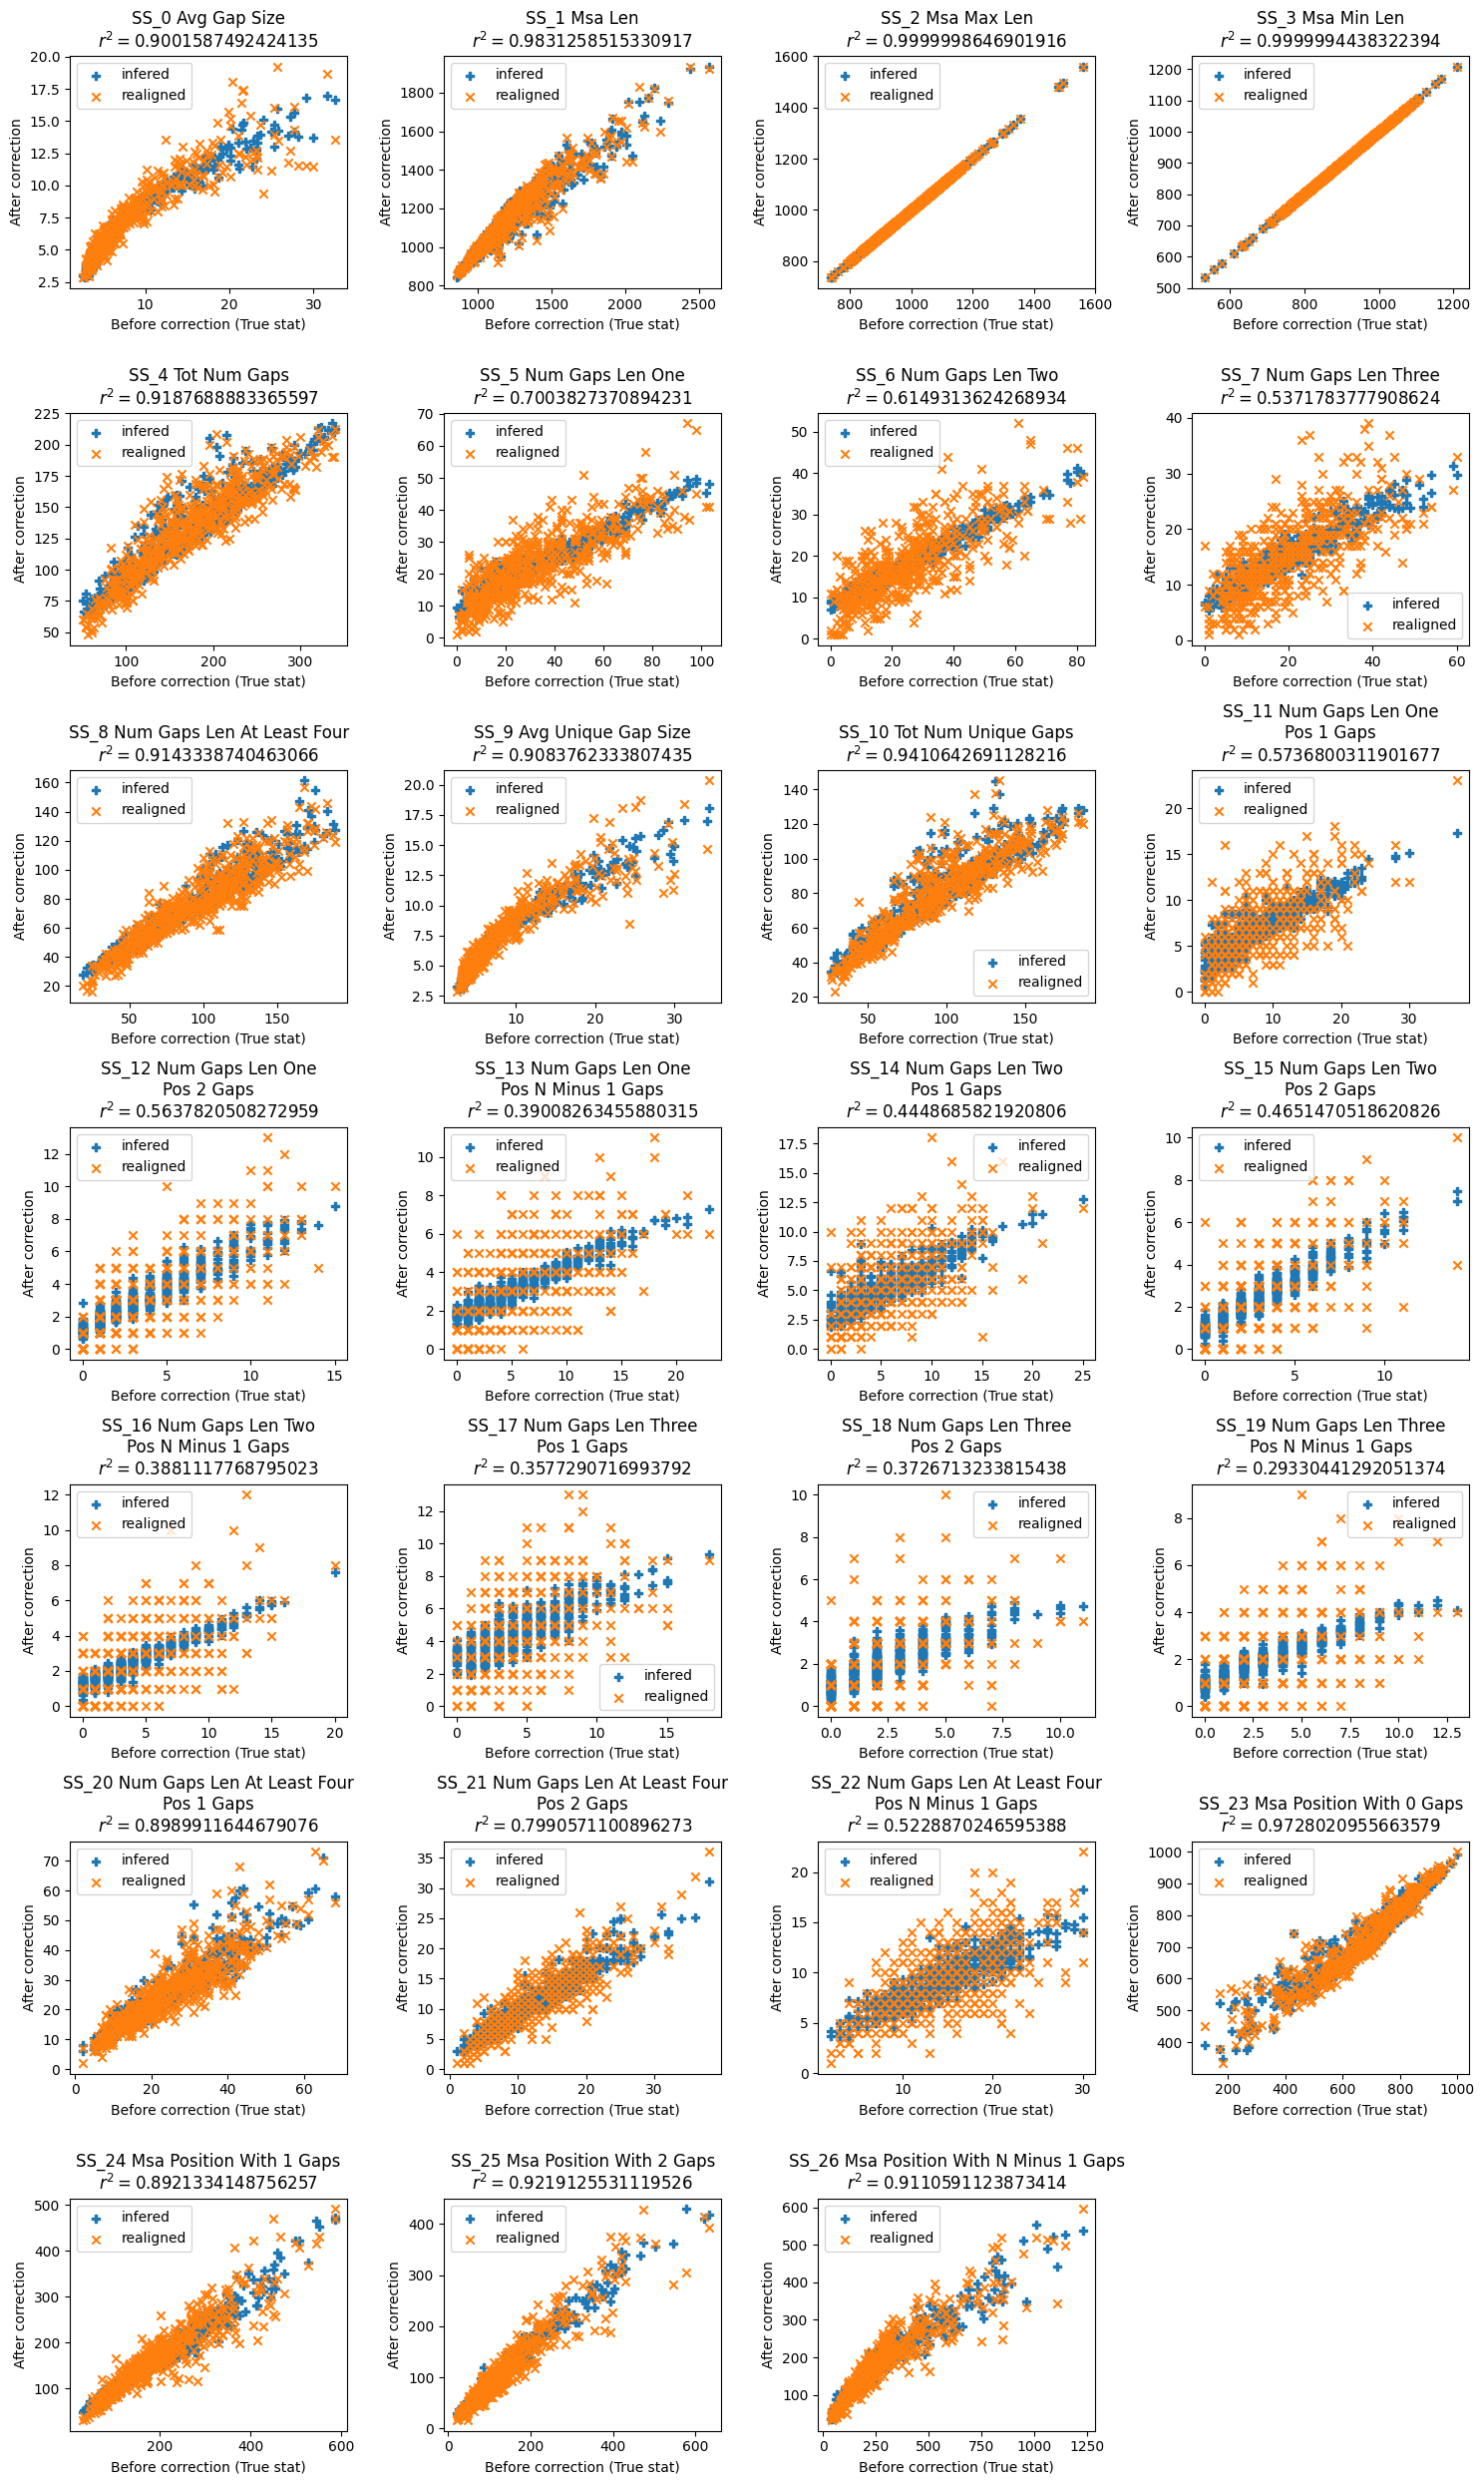

In [6]:
# current_feature = "19"

# plt.subplot(7,4)
plt.figure(figsize=(15,25),layout="tight")

for sum_stat in range(27):
    current_feature = str(sum_stat)
    stat_def = SUMSTATS_DEFINITION[SUMSTATS_LIST[int(current_feature)]].replace("_", " ").title()
    plot_title = f"SS_{current_feature} {stat_def}"
    plt.subplot(7,4, sum_stat+1)
    plt.scatter(true_stats[current_feature], infered_stats[current_feature],
                marker="P", label="infered")
    plt.scatter(true_stats[current_feature], realinged_stats[current_feature],
                marker='x', label="realigned")
    plt.xlabel("Before correction (True stat)")
    plt.ylabel("After correction")
    plt.legend()
    r_value = st.pearsonr(realinged_stats[current_feature], infered_stats[current_feature])
    plt.title(f"{plot_title}\n$r^2={r_value[0]**2}$")

plt.show()

In [241]:
current_reg_type = "geometric_sim"
regressors_dict = {}
regressors_path = pathlib.Path(MAIN_PATH, "correction", f"regressors_{current_reg_type}")
with open(regressors_path, 'rb') as f:
    regressors = pickle.load(f)


In [277]:
regressors[18].v

-1.7239393873193142e-06

In [309]:
pca = decomposition.PCA(n_components=7)
pca.fit(infered_stats)
pca.explained_variance_ratio_.sum()

0.9994214410922411

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [86]:
true_stats_with_params = pd.read_csv(MAIN_PATH / "true_stats.csv")
realinged_stats = pd.read_csv(MAIN_PATH / "realigned_stats.csv")

In [87]:
X = true_stats_with_params
Y = realinged_stats
# train_mean = X.mean()
# train_std = X.std()+1e-4
X_train = (X-train_mean)/(train_std)



In [88]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-2.507945,-1.287684,-1.287684,18.372146,18.372146,-0.046664,0.201256,0.256360,-2.092059,8.806727,...,-1.178840,-0.230439,0.229961,-0.190768,-0.446184,-2.034986,-1.359726,-0.747399,-0.504980,0.601714
1,-0.658241,-1.679909,-1.679909,17.120135,17.120135,0.035660,1.461002,0.488991,-0.950734,11.017282,...,0.459348,-0.731394,-0.158486,-0.110748,-0.293172,-0.266970,-1.245713,-0.232875,0.217108,0.846864
2,-2.846177,-0.465255,-0.465255,21.880701,21.880701,-0.790472,-0.839888,-2.206325,-3.096426,14.670838,...,2.097536,5.781018,-0.935380,-0.430828,0.777915,-2.211787,-2.186325,-0.397911,-0.043646,-0.292363
3,-0.711090,0.626816,0.626816,19.054841,19.054841,-0.245494,2.624415,-0.128685,-1.690313,22.975769,...,4.390999,4.278153,-0.935380,3.330118,4.603226,-2.388589,-2.927413,-0.427035,0.778731,1.889953
4,-0.890775,0.308728,0.308728,16.131994,16.131994,1.297241,6.436999,1.523800,-2.448153,17.955968,...,3.080449,0.771470,-0.935380,4.610440,5.674313,-2.034986,-3.201046,-1.155135,0.156934,4.259737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-3.015292,0.891423,0.891423,20.491913,20.491913,-0.562211,0.353166,-1.468322,-3.571218,19.567831,...,2.425174,4.779108,-0.935380,2.449896,3.685151,-1.858184,-2.744991,-0.339663,-0.264284,0.125834
496,-2.930735,-0.238227,-0.238227,12.685140,12.685140,4.335199,4.154636,-1.163494,-4.365580,5.659757,...,0.786986,1.272425,-1.323827,3.250098,2.308040,-2.388589,-3.611495,-1.795863,-0.996400,4.980767
497,-2.116865,0.245120,0.245120,19.891419,19.891419,-0.017210,2.287247,-0.690210,-2.986859,18.616064,...,4.063361,3.777199,-0.546933,2.449896,3.685151,-1.858184,-2.727889,-0.553239,-0.073733,1.721713
498,-1.852621,0.145434,0.145434,13.222549,13.222549,5.267224,8.545222,5.069425,-4.055140,8.284791,...,1.769898,2.274334,-1.323827,5.090561,6.745400,-2.565390,-3.674202,-1.941483,-0.886081,8.071580


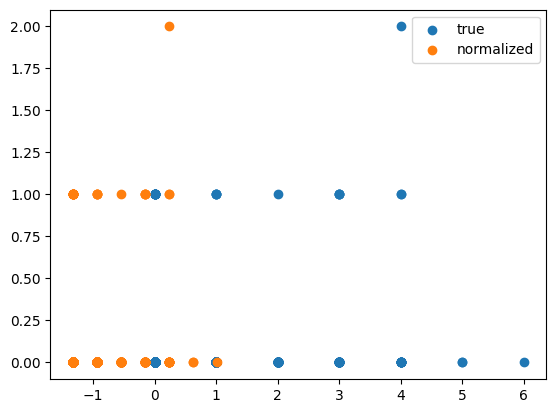

In [84]:
plt.scatter(X["24"],Y["19"], label="true")
plt.scatter(X_train["24"],Y["19"], label="normalized")
plt.legend()

In [26]:
reg = linear_model.Lasso()
parameters = {'alpha':np.logspace(-3,4,20)}
clf_ridgecv = GridSearchCV(estimator = reg,
                            param_grid = parameters, cv=3, scoring="neg_mean_squared_error")
clf_ridgecv.fit(X_train, Y["19"])
print(st.pearsonr(clf_ridgecv.predict(X_train), Y["19"])[0]**2)

/home/elyawy/envs/work/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e-01, tolerance: 8.265e-02
  model = cd_fast.enet_coordinate_descent(
/home/elyawy/envs/work/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e-01, tolerance: 8.605e-02
  model = cd_fast.enet_coordinate_descent(


0.281281430467587


In [17]:
clf_ridgecv.best_score_

0.2639159063907273

In [53]:

clf = RandomForestRegressor()
selected_feature = "19"



# Criterion
criterion = ['squared_error', 'absolute_error','poisson']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {
              'criterion': criterion,
              'n_estimators': n_estimators,
              'max_depth': [3,5,7,9],
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
             }
clf_forestcv = RandomizedSearchCV(clf, param_grid, cv=10, scoring="neg_mean_squared_error")
clf_forestcv.fit(X=X_train, y=Y[selected_feature])

# true_stats = true_stats_with_params[map(str, range(5,len(true_stats_with_params.columns)))]
# true_stats.columns = map(str, range(0,27))
print(st.pearsonr(clf_forestcv.predict(X_train), Y["19"])[0]**2)

0.5853598026915589


In [127]:
clf_forestcv.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1550,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
clf_forestcv.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1550,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

PearsonRResult(statistic=0.21470318703358846, pvalue=1.2628433388830345e-06)

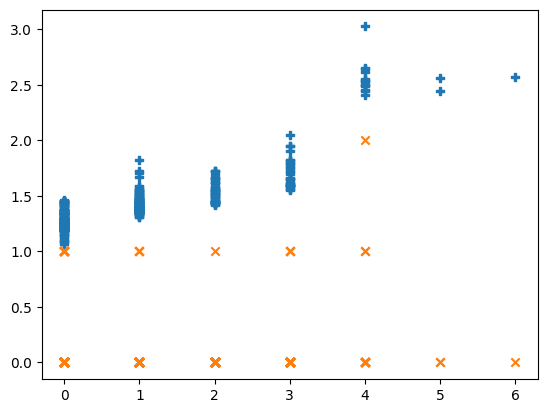

In [90]:
infered_stat = clf_forestcv.predict(X_train)

plt.scatter(true_stats[selected_feature], infered_stat,
            marker="P", label="infered")
plt.scatter(true_stats[selected_feature], realinged_stats[selected_feature],
            marker='x', label="realigned")
st.pearsonr(infered_stat, realinged_stats[selected_feature])